# APS1070 Lecture Code

## Part 1: 2-layer neural network without PyTorch

In this example we will implement a 2-layer neural network from scratch. This network is using a squared error loss for a multiclass classification problem, ideally we should be using a softmax loss function.

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=7ff9e1c674dca35b3d9602360ddb211e967dde9efa767ce3791d666d2c0b1feb
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!wget "https://saref.github.io/teaching/APS1070/Iris_3class.csv"

--2023-11-28 16:01:04--  https://saref.github.io/teaching/APS1070/Iris_3class.csv
Resolving saref.github.io (saref.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to saref.github.io (saref.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2558 (2.5K) [text/csv]
Saving to: ‘Iris_3class.csv’

Iris_3class.csv     100%[===================>]   2.50K  --.-KB/s    in 0s      

2023-11-28 16:01:04 (21.5 MB/s) - ‘Iris_3class.csv’ saved [2558/2558]



In [3]:
import pandas as pd
raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data.values.shape

(150, 5)

In [4]:
import numpy as np
raw_data = raw_data.values

X_train = raw_data[:,:4]
y_train = raw_data[:,4:5].astype(int)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 1)
float64 int64


convert labels (ground truths) into one-hot vectors

In [5]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [6]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

At its core, a 2-layer neural network is just a few lines of code.

Note that we have excluded the bias terms to keep things simple.

In [7]:
#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ann(W, X_train, y_train):

  #Weights
  w0 = W[:20].reshape(4,5)
  w1 = W[20:].reshape(5,3)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1)) #predictions

  return layer2

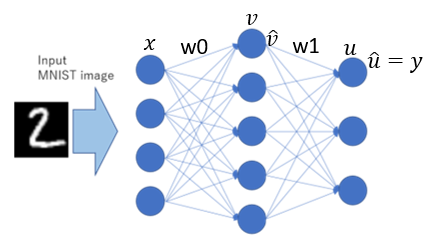

Most of the complexity introduced is to train the network through backpropagation.

In [8]:
#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ann(W, X_train, y_train):

  #Weights
  w0 = W[:20].reshape(4,5)
  w1 = W[20:].reshape(5,3)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1)) #predictions

  #Back propagation using gradient descent
  dw0, dw1 = np.zeros((4,5)), np.zeros((5,3))

  #calculate partial derivatives in a bachward path
  dL_du_hat = layer2-y_train      # derivative of the cost function by the output
  du_hat_du = layer2*(1-layer2)   # derivative of the sigmoid function on the output layer
  du_dv_hat = w1.T                # derivative of the linear combination in second layer
  dv_hat_dv = layer1*(1-layer1)   # derivative of the sigmoid function on the hidden layer
  dv_dw0 = X_train
  du_dw1 = layer1

  #gradients
  dw1 += du_dw1.T.dot(dL_du_hat*du_hat_du)
  dw0 += dv_dw0.T.dot((dL_du_hat*du_hat_du).dot(du_dv_hat)*(dv_hat_dv))

  #combine gradients
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))

  #squared error
  error = 0.5*np.sum((layer2 - y_train)**2)

  return (error, dW, layer2)

Train neural network

In [9]:
#initialize weights
w0 = 2*np.random.random((4, 5)) - 1
w1 = 2*np.random.random((5, 3)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
errors = []
for i in range(100000):
  (error, dW, y_hat) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)

In [10]:
#examine predictions on training data
np.round(y_hat,1)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

The above is just a demonstration of building a neural network from scratch. To properly assess this network you should create a validation data set.

To verify manually calculated gradients using a numerical approach (optional)

In [ ]:
# #initialize weights
# w0 = 2*np.random.random((4, 5)) - 1
# w1 = 2*np.random.random((5, 3)) - 1

# #combine weights
# W = np.array(list(w0.flatten()) + list(w1.flatten()))

# #compute gradients analytically
# (error, dW, y_hat) = ann(W, X_train, y_train)

# #compute gradients numerically
# dW_num = np.zeros((len(W),1))

# for ind in range(len(W)):
#   #reset gradients
#   We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
#   We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

#   #increment slightly
#   We1[ind] = We1[ind] + 0.000001
#   We2[ind] = We2[ind] - 0.000001

#   #compute errors
#   (error_e1, dW_e1, y_hat) = ann(We1, X_train, y_train)
#   (error_e2, dW_e2, y_hat) = ann(We2, X_train, y_train)

#   #calculate each gradient
#   grad_num = (error_e1-error_e2)/0.000002

#   #display difference
#   print(round(abs(grad_num-dW[ind]),4), grad_num, dW[ind])

#Part 2 PyTorch
# 2.1 PyTorch Basics

### What is PyTorch?

PyTorch is a scientific computing package that builds on the NumPy library to allow for the use of GPUs. It incorporates deep learning capabilities while maximizing flexibility and speed.

### PyTorch Basics

To use PyTorch you must first import the library









In [11]:
import torch

#### Tensors
Tensors are n-dimensional arrays that allow that can be used with a GPU to accelerate computing. There are several ways to work with Tensors:

In [12]:
# initialize a random tensor
x = torch.rand(4, 3)
print(x)

tensor([[0.2307, 0.1064, 0.7081],
        [0.1194, 0.1166, 0.2219],
        [0.8293, 0.2720, 0.6627],
        [0.4776, 0.5450, 0.3044]])


In [13]:
# initialize a tensor loaded with zeros
x = torch.zeros(4, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [14]:
# initialized with data entered manually
x = torch.tensor([2.1, 4.0, -5.2])
print(x)

tensor([ 2.1000,  4.0000, -5.2000])


In [15]:
# initialized with data from numPy
import numpy as np
data = np.array([2.1, 4.0, -5.2])
print(data)
x = torch.tensor(data)
print(x)

# note that you can easily convert a tensor to numpy array
x_np = x.numpy()
print(x_np)

[ 2.1  4.  -5.2]
tensor([ 2.1000,  4.0000, -5.2000], dtype=torch.float64)
[ 2.1  4.  -5.2]


### Tensor size and shape

In [16]:
# obtain size of tensor data structure
# similar to .shape() in Numpy
x = torch.zeros(4, 3)
print(x.size())

torch.Size([4, 3])


### Operations


In [17]:
# tensor addition
x = torch.rand(4, 3)
y = torch.ones(4, 3)
print(x + y)

tensor([[1.3715, 1.6953, 1.7046],
        [1.6260, 1.9218, 1.5437],
        [1.8700, 1.3806, 1.8607],
        [1.1565, 1.7857, 1.8275]])


In [ ]:
# Same tensor addition by
# providing output tensor as argument
# result = torch.ones(4,3)
# torch.add(x, y, out = result)
# print(result)

In [ ]:
# tensor multiplication
# * is for entry-wise multiplication
# @ is for matrix multiplication
x = torch.rand(4, 3)
y = torch.ones(4, 3)
z = torch.ones(3, 4)
print("x= ",x, "\n\n x*y= ", x * y, "\n\n x@z= ", x@z)

x=  tensor([[9.7777e-01, 9.7276e-01, 1.4476e-01],
        [3.4626e-01, 5.2667e-01, 4.9526e-01],
        [4.7285e-01, 5.3592e-01, 9.7343e-01],
        [3.9673e-04, 9.3746e-01, 2.7941e-01]]) 

 x*y=  tensor([[9.7777e-01, 9.7276e-01, 1.4476e-01],
        [3.4626e-01, 5.2667e-01, 4.9526e-01],
        [4.7285e-01, 5.3592e-01, 9.7343e-01],
        [3.9673e-04, 9.3746e-01, 2.7941e-01]]) 

 x@z=  tensor([[2.0953, 2.0953, 2.0953, 2.0953],
        [1.3682, 1.3682, 1.3682, 1.3682],
        [1.9822, 1.9822, 1.9822, 1.9822],
        [1.2173, 1.2173, 1.2173, 1.2173]])


In [18]:
# resize and reshape tensors
x = torch.randn(4, 3)
y = x.view(12)
z = x.view(-1, 4)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size(),"\n")
print("x= ",x, "\n\n y= ",  y, "\n\n z= ", z)

torch.Size([4, 3]) torch.Size([12]) torch.Size([3, 4]) 

x=  tensor([[ 0.0986, -0.0409, -0.2705],
        [-0.1694, -0.4734,  0.3931],
        [ 0.1159, -1.0986,  1.8033],
        [-0.4484,  0.2793, -0.7648]]) 

 y=  tensor([ 0.0986, -0.0409, -0.2705, -0.1694, -0.4734,  0.3931,  0.1159, -1.0986,
         1.8033, -0.4484,  0.2793, -0.7648]) 

 z=  tensor([[ 0.0986, -0.0409, -0.2705, -0.1694],
        [-0.4734,  0.3931,  0.1159, -1.0986],
        [ 1.8033, -0.4484,  0.2793, -0.7648]])


In [19]:
# convert one element tensor to a Python number
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.6578])
0.6578395366668701


### Automatic Differentiation

The PyTorch autograd package allows for easy computation of derivatives. This is handled automatically using a define-by-run framework, which works as you write your code.

To enable this feature you need to set the Tensor attribute .required_grat to True, at which point it begins to track all operations performed on it. After your computation have been completed you can call .backward() and all the gradients will be computed for you. The gradient for each tensor will be stored in the tensor attribute .grad.

Each tensor also has a .grad_fn attribute which references the function that has created it.



In [ ]:
# Example computation of gradients

x = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]], requires_grad=True)
print("x= ",x)

#perform some operations
y = x + 10
z = y*y
out = z.mean()

print("\n \n y= ",y, "\n \n z= ",z, "\n \n out= " , out)

x=  tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

 
 y=  tensor([[11., 12.],
        [13., 14.]], grad_fn=<AddBackward0>) 
 
 z=  tensor([[121., 144.],
        [169., 196.]], grad_fn=<MulBackward0>) 
 
 out=  tensor(157.5000, grad_fn=<MeanBackward0>)


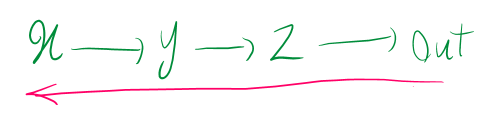

In [ ]:
# compute the gradients with respect to the output
# It does backward pass computations to find
# the gradient of out based on the original input (x)
# Each entry of x.grad shows how sensitive the output is
# to the corresponding entry of x
out.backward()
print(x.grad)

tensor([[5.5000, 6.0000],
        [6.5000, 7.0000]])


Each tensor also has a .grad_fn attribute which references the function that has created it.

In [ ]:
print("\n x comes from",x.grad_fn)
print("\n y comes from",y.grad_fn)
print("\n z comes from",z.grad_fn)
print("\n out comes from",out.grad_fn)


 x comes from None

 y comes from <AddBackward0 object at 0x7c75b07b08e0>

 z comes from <MulBackward0 object at 0x7c75b07b3cd0>

 out comes from <MeanBackward0 object at 0x7c75b07b08e0>


## 2.2 MNIST Binary Classification
In this example we will train an "artificial pigeon" to perform a digit recognition
task. That is, we will use the MNIST dataset of hand-written digits, and train
the pigeon to **recognize a small digit, namely a digit that is less than 3**.
This problem is a **binary classification problem** we want to predict
which of two classes an input image is a part of.

### Load MNIST Data
The MNIST dataset contains hand-written digits that are 28x28 pixels large.
Here are a few digits in the dataset:


In [20]:
from torchvision import datasets, transforms

# load the data
mnist_train = datasets.MNIST('data', train=True, download=True)

# using the first 2000 samples for training
mnist_train = list(mnist_train)[:2000]

100%|██████████| 9912422/9912422 [00:00<00:00, 100156371.94it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70881037.93it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29942423.56it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1698816.55it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



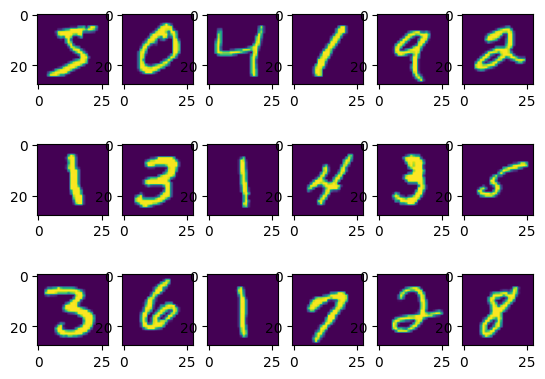

In [21]:
# plot the first 18 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image)


### Defining the ANN Forward Pass
Here is an implementation of the artificial pigeon brain in PyTorch.

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting

import torch.optim as optim

torch.manual_seed(1) # set the random seed

class Pigeon(nn.Module):
    # The architecture
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        # Note that we have one output neuron because this is a binary classification task
        self.layer2 = nn.Linear(30, 1)
    # Wiring the neurons
    def forward(self, img):
        # We reshape the input so that there are 28*28 columns and n rows.
        # n is inferred automatically using "-1" as an argument
        flattened = img.view(-1, 28 * 28)
        # we feed the input to the first layer
        activation1 = self.layer1(flattened)
        # 30 numbers will come out and a tanh activation is applied to them
        intermediate = torch.tanh(activation1)
        # The 30 intermediate outputs are fed into layer2 which has 1 output
        activation2 = self.layer2(intermediate)
        return activation2

pigeon = Pigeon()

In [23]:
# The architecture of the model
print (pigeon)

Pigeon(
  (layer1): Linear(in_features=784, out_features=30, bias=True)
  (layer2): Linear(in_features=30, out_features=1, bias=True)
)


In this network, there are 28x28 = 784 input neurons, to work with our 28x28 pixel images. We have a single output neuron and a hidden layer of 30 neurons.

The variable `pigeon.layer1` contains information about the connectivity
between the input layer and the hidden layer (stored as a matrix), and the
biases (stored as a vector).

Similarly, the variable `pigeon.layer2` contains information about the weights
between the hidden layer and the output layer, and the bias.

The weights and biases adjust during training, so they are called the model's
**parameters**.

In [ ]:
# view the shape of the weight tensors
# and the initialized values
# we have a [30, 784] tensor for weights and a [30] tensor for biases
# each row of the tensor is responsible for one output neuron
# Q: how many trainable parameters we have in layer 1?
for w in pigeon.layer1.parameters():
    print("shape: ", w.shape , w ,"\n \n" )

shape:  torch.Size([30, 784]) Parameter containing:
tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [ 0.0267,  0.0186, -0.0326,  ...,  0.0047, -0.0072, -0.0301],
        [-0.0190,  0.0291,  0.0221,  ...,  0.0067,  0.0206,  0.0151],
        [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073]],
       requires_grad=True) 
 

shape:  torch.Size([30]) Parameter containing:
tensor([-0.0210,  0.0144,  0.0214, -0.0018, -0.0185,  0.0275, -0.0284, -0.0248,
        -0.0180, -0.0168, -0.0226, -0.0093,  0.0211, -0.0311,  0.0002, -0.0010,
         0.0201,  0.0176, -0.0050,  0.0118, -0.0089,  0.0078, -0.0072,  0.0118,
         0.0122, -0.0125,  0.0326,  0.0306,  0.0058, -0.0089],
       requires_grad=True) 
 



### Test Network Forward Pass
Here is an example of using the network (before training) to classify whether the
image contains a small digit.

In [25]:
# make predictions for the first 10 images in mnist_train
img_to_tensor = transforms.ToTensor() #transform the image data into a 28x28 matrix of numbers

for k, (image, label) in enumerate(mnist_train[:10]):
    inval = img_to_tensor(image)
    outval = pigeon(inval)       # find the output activation given input
    prob = torch.sigmoid(outval) # turn the activation into a probability
    print(prob)

tensor([[0.5196]], grad_fn=<SigmoidBackward0>)
tensor([[0.5377]], grad_fn=<SigmoidBackward0>)
tensor([[0.4904]], grad_fn=<SigmoidBackward0>)
tensor([[0.4942]], grad_fn=<SigmoidBackward0>)
tensor([[0.4945]], grad_fn=<SigmoidBackward0>)
tensor([[0.4982]], grad_fn=<SigmoidBackward0>)
tensor([[0.4822]], grad_fn=<SigmoidBackward0>)
tensor([[0.4989]], grad_fn=<SigmoidBackward0>)
tensor([[0.4811]], grad_fn=<SigmoidBackward0>)
tensor([[0.4839]], grad_fn=<SigmoidBackward0>)


Since we haven't trained the network
yet, the predicted probability of images containing a small digit
is close to half. The "pigeon" is unsure.

In order for the network to be useful, we need to train it, so
that the weights become meaningful values through backpropagation.

### Update Parameters using Gradient Descent with Cross-Entropy
To update the parameters (weights) we will first use the network to make predictions, then compare the predictions
against the ground truth. To compare the predictions against target class values we'll compute a classification error using the Cross-Entropy equation.

The classification error quantifies how good or bad the prediction was compared to the target class value. It is more commonly referred to as the **loss** and Cross-Entropy is the **loss function**. The introduction of a loss function makes our problem a **optimization** problem: what set of parameters minimizes the loss across the training examples?

Turning a learning problem into an optimization problem
is actually a very subtle but important step in many machine learning tools,
because it allows us to use tools from mathematical optimization.

There are **optimizers** that can tune the network parameters for
us. The gradient descent algorithm is one example of an optimizer.

For now, we will choose a standard loss function for a binary classification
problem: the **binary cross-entropy loss**. We'll also choose
a **stochastic gradient descent** optimizer.

In [26]:
# simplified training code to train `pigeon` on the "small digit recognition" task
import torch.optim as optim
# Defining the loss function
criterion = nn.BCEWithLogitsLoss()
# Defining the optimizer and its parameters
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

Now, we can start to train the pigeon network, similar to the way we would train
a real pigeon:

1. We'll show the network pictures of digits, one by one
2. We'll see what the network predicts
3. We'll check the loss function for that example digit, comparing the network prediction against the ground truth
4. We'll make a small update to the parameters to try and improve the loss for that digit
5. We'll repeat steps 1-4 many times.

For simplicity, we'll use 1000 images, and show the network each image only once.

In [27]:
for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    # we create a tensor for binary labels
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

It is very common to run into errors with changing different data types to tensors with the correct shape.

### Test Updated Network Forward Pass

In [28]:
# make predictions for the first 10 images in mnist_train
# The first image was a 5 and the prediction is close to 0 (not being a small digit)
for k, (image, label) in enumerate(mnist_train[:10]):
    print(label, torch.sigmoid(pigeon(img_to_tensor(image))))

5 tensor([[0.0085]], grad_fn=<SigmoidBackward0>)
0 tensor([[0.9310]], grad_fn=<SigmoidBackward0>)
4 tensor([[0.0259]], grad_fn=<SigmoidBackward0>)
1 tensor([[0.9332]], grad_fn=<SigmoidBackward0>)
9 tensor([[0.0092]], grad_fn=<SigmoidBackward0>)
2 tensor([[0.5839]], grad_fn=<SigmoidBackward0>)
1 tensor([[0.8214]], grad_fn=<SigmoidBackward0>)
3 tensor([[0.0186]], grad_fn=<SigmoidBackward0>)
1 tensor([[0.8170]], grad_fn=<SigmoidBackward0>)
4 tensor([[0.0051]], grad_fn=<SigmoidBackward0>)


Not bad! We'll use the probability 50% as the cutoff for making a
discrete prediction. Then, we can compute the accuracy on the 1000
images we used to train the network.

### Evaluating the Training Error

In [29]:
# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
# print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Accuracy: 0.96


The accuracy on those 1000 images is 96%, which is really good considering
that we only showed the network each image only once.

However, this accuracy is not representative of how well the network will perform,
because the network was *trained* on the data. The network had a chance to
see the actual answer, and learn from that answer. To get a better sense of
the network's predictive accuracy, we should compute accuracy numbers on
a **test set**: a set of images that were not seen in training.

### Evaluating the Test Error

In [30]:
# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
# print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Accuracy: 0.906


## 2.3 PyTorch multiclass classification Example

see file "PyTorch_Example_MNIST" for another example on using PyTorch.